# Projeto 7 - Charuco AR

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

dictionary = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_50)

board = cv2.aruco.CharucoBoard_create(5, 7, 4, 2, dictionary)

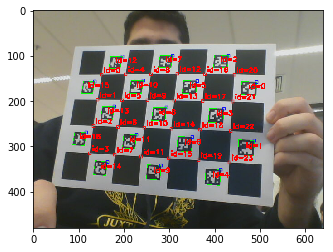

In [2]:
lista_images = []
lista_corners = []
lista_ids = []
for i in range(1,12):
    img = plt.imread('charuco-camera-%d.png' % (i), cv2.IMREAD_GRAYSCALE)
    corners, ids, rejected = cv2.aruco.detectMarkers(img, dictionary)
    img = cv2.aruco.drawDetectedMarkers(img, corners, ids)
    retval, charucoCorners, charucoIds = cv2.aruco.interpolateCornersCharuco(corners, ids, img, board)
    img = cv2.aruco.drawDetectedCornersCharuco(img, charucoCorners, charucoIds)
    if len(charucoCorners) > 4:
        lista_corners.append(charucoCorners)
        lista_ids.append(charucoIds)
        lista_images.append(img)
        
plt.imshow(lista_images[0])

In [3]:
height, width, rgb = img.shape
imageSize = (height, width)
print(imageSize)
retval, cameraMatrix, distCoeffs, rvecs, tvecs = cv2.aruco.calibrateCameraCharuco(lista_corners, lista_ids, board, imageSize, None, None)

(480, 640)


In [4]:
img = cv2.imread('charuco-camera-4.png', cv2.IMREAD_GRAYSCALE)
corners, ids, rejected = cv2.aruco.detectMarkers(img, dictionary)
retval, charucoCorners, charucoIds = cv2.aruco.interpolateCornersCharuco(corners, ids, img, board)
retval, rvec, tvec = cv2.aruco.estimatePoseCharucoBoard(charucoCorners, charucoIds, board, cameraMatrix, distCoeffs)

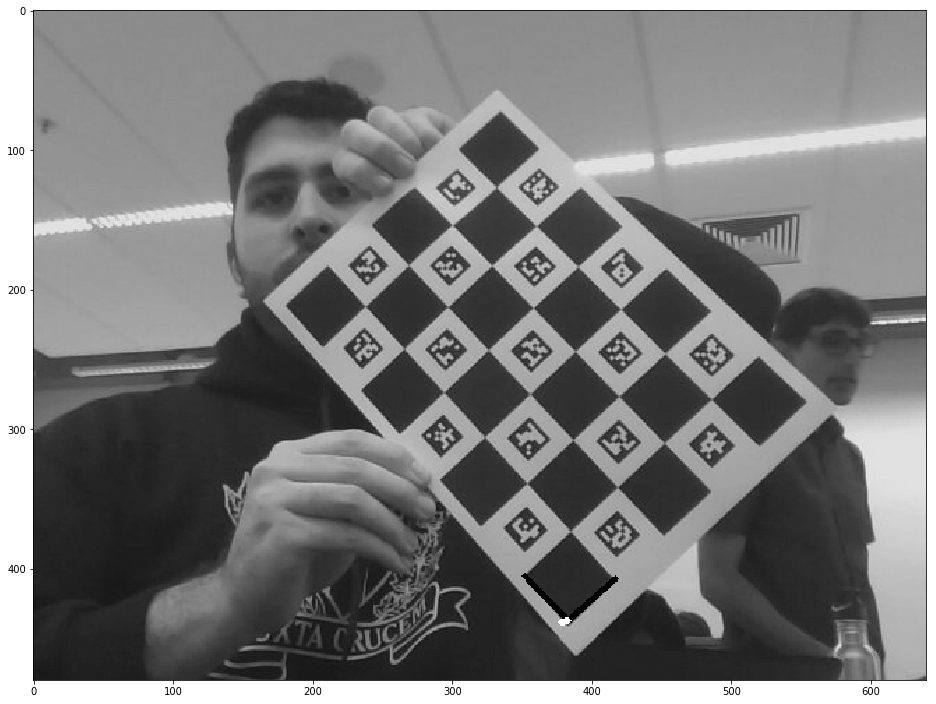

In [5]:
img_final = cv2.aruco.drawAxis(img, cameraMatrix, distCoeffs, rvec, tvec, 4)
plt.figure(figsize=(16,16))
plt.imshow(img_final, cmap="gray")

In [6]:
img2 = cv2.imread('charuco-2.png', cv2.IMREAD_GRAYSCALE)
height, width = img2.shape
corners2, ids2, rejected2 = cv2.aruco.detectMarkers(img2, dictionary)
retval2, charucoCorners2, charucoIds2 = cv2.aruco.interpolateCornersCharuco(corners2, ids2, img2, board)
charucoCorners2 = charucoCorners2.reshape(24,2)
img3 = cv2.imread('Quokka2.jpg')

In [7]:
captura = cv2.VideoCapture(0)

captura.set(cv2.CAP_PROP_BUFFERSIZE, 1)

while True:
    _, frame = captura.read()
    if frame is None:
        break
        
    corners, ids, rejected = cv2.aruco.detectMarkers(frame, dictionary)
    if ids is not None and len(ids) == 17:
        retval, charucoCorners, charucoIds = cv2.aruco.interpolateCornersCharuco(corners, ids, frame, board)
        height, x, width = charucoCorners.shape
        charucoCorners = charucoCorners.reshape(height,2)
        
        
        homo = cv2.findHomography(charucoCorners2, charucoCorners, cv2.RANSAC)
        height, width, rgb = frame.shape
        shape = (width, height)
        dst = cv2.warpPerspective(img3, homo[0], shape)

        cv2.imshow("Video", dst)
    
    else:
        frame = cv2.aruco.drawDetectedMarkers(frame, corners, ids)
        cv2.imshow("Video", frame)
    
    # Pressione ESC para sair do loop
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

captura.release()
cv2.destroyAllWindows()

In [9]:
import pywavefront
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


scene = pywavefront.Wavefront('teapot.obj')
vertices = np.array(scene.vertices)

imagePoints = cv2.projectPoints(vertices/10, rvec, tvec, cameraMatrix, distCoeffs)


Unimplemented OBJ format statement 'g' on line 'g Object001'
